# **DBSCAN Clustering with Global Refugees Dataset 1951-2015**

## Introduction

To analyze the "Global Refugees Dataset 1951-2015" using the DBSCAN clustering algorithm, I will first perform a detailed exploratory data analysis (EDA) to understand the dataset's structure, distributions, and potential clusters. Following the EDA, I'll apply DBSCAN to identify clusters within the dataset, focusing on the geographic and temporal aspects of refugee movements. This approach will enable us to understand the patterns of refugee flows over time and across different regions.

### DBSCAN Algorithm

DBSCAN operates as follows:

1. **Density Estimation**: The algorithm begins by estimating the local density around each data point in the dataset. It does this by measuring the number of data points within a specified distance (radius) ε from each point. This radius parameter ε is a crucial input to the algorithm.

2. **Core Points**: DBSCAN identifies core points as those data points that have at least a minimum number of data points (minPts) within the ε neighborhood. These core points are considered the central elements of clusters.

3. **Connected Components**: The algorithm proceeds to form clusters by connecting core points that are within ε distance of each other. This step groups together core points that are densely connected, defining the core of each cluster.

4. **Expand Clusters**: DBSCAN expands clusters by assigning border points to the cluster of a core point. Border points are data points that are within ε distance of a core point but are not core points themselves. This step allows the clusters to grow beyond just the core points.

5. **Noise Points**: Any remaining data points that are neither core points nor border points are considered noise or outliers. These points do not belong to any cluster and are often labeled accordingly.

6. **Iterative Process**: DBSCAN repeats these steps for all data points in the dataset until all points are either assigned to a cluster or labeled as noise. The algorithm does not require the number of clusters (k) to be predetermined, which is a notable advantage.

DBSCAN's ability to create clusters based on data density rather than assuming predefined shapes or sizes makes it a robust and flexible clustering technique. The ε and minPts parameters are crucial for the algorithm's performance and may require experimentation and fine-tuning depending on the dataset's characteristics.

This algorithm is particularly useful when dealing with datasets that contain clusters of irregular shapes, varying densities, and noisy data points. It excels in scenarios where traditional clustering methods may struggle to provide meaningful results.

## Advantages and Disadvantages

### Advantages

- **Robust to Shape and Size**: DBSCAN can detect clusters of varying shapes, sizes, and densities, making it versatile in real-world scenarios.
- **Noise Tolerance**: It is capable of identifying and labeling noisy data points as outliers.
- **Automatic Cluster Detection**: DBSCAN can automatically determine the number of clusters without the need for specifying k in advance.
- **Suitable for Non-Uniform Data**: Effective in datasets with non-uniform cluster densities.

### Disadvantages

- **Sensitivity to Parameters**: The choice of ε and minPts parameters can impact the results and may require careful tuning.
- **Difficulty with High-Dimensional Data**: DBSCAN's performance may deteriorate in high-dimensional spaces due to the "curse of dimensionality."
- **Memory and Time Complexity**: The algorithm can have higher memory and time requirements for large datasets.

### Exploratory Data Analysis (EDA)

1. Load the dataset: Import necessary libraries and load the dataset to get an overview of its structure.
2. Data Cleaning: Check for missing values and decide on handling strategies.
3. Descriptive Statistics: Generate basic statistics to understand distributions of numerical fields.
4. Visualization:
    - Plot the total number of refugees over time to identify trends.
    - Visualize the distribution of refugees by country of origin and asylum/residence.

### DBSCAN Clustering

- Preparation: Select relevant features for clustering, possibly focusing on numerical representations of refugee counts and time.

- Parameter Selection: Use techniques to estimate optimal parameters for DBSCAN (e.g., ε (epsilon) and min_samples).

- Clustering Execution: Apply DBSCAN with selected parameters.

- Analysis of Clusters: Examine the resulting clusters to identify patterns or groups with similar characteristics in refugee movements.

- Visualization: Create visualizations to represent the clusters, potentially mapping the clusters over time or by geographical distribution.

This analysis aims to reveal patterns in the global refugee crisis, such as identifying periods of high displacement activity or regions with similar refugee intake profiles. Let's start with the EDA to set a foundation for the clustering analysis.

The dataset comprises data on global refugees from 1951 to 2015, detailing various aspects of refugee and displacement statistics across different countries and territories. Here's a brief overview of the dataset's structure and the types of data it contains:

### Columns:

- Year: Year of data collection.
- Country / territory of asylum/residence: Host country or territory.
- Origin: Country of origin.
- Refugees (incl. refugee-like situations): Number of refugees and similar situations.
- Asylum-seekers (pending cases): Count of individuals seeking asylum with pending cases.
- Returned refugees: Number of refugees who have returned to their origin.
- Internally displaced persons (IDPs): Count of people displaced within their own country.
- Returned IDPs: Number of IDPs who have returned.
- Stateless persons: Individuals without legal recognition by any country.
- Others of concern: Additional populations needing humanitarian assistance.
- Total Population: Sum of all above categories, representing the overall population affected by displacement.

Given the dataset's composition, for DBSCAN clustering, we will need to preprocess and possibly transform the data to a suitable format. Specifically, numerical columns will be used for clustering, while categorical data (e.g., Country / territory of asylum/residence and Origin) might be used to analyze or visualize the clusters afterward.

Before proceeding with DBSCAN, let's conduct some basic data cleaning and exploratory analysis to better understand the dataset's characteristics and prepare it for clustering. This will include handling missing values, converting columns to appropriate data types, and summarizing key statistics. ​​

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Global-Refugee-Dataset-1951-2015.csv'
refugee_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
refugee_data.head()


/var/folders/ys/0dv0xj597t52lx33mb7z3t9w0000gn/T/ipykernel_73738/794513031.py:5: DtypeWarning: Columns (3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  refugee_data = pd.read_csv(file_path)


,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
0,1951,Australia,Various/Unknown,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000
1,1951,Austria,Various/Unknown,282000.0,NaN,NaN,NaN,NaN,NaN,NaN,282000
2,1951,Belgium,Various/Unknown,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,55000
3,1951,Canada,Various/Unknown,168511.0,NaN,NaN,NaN,NaN,NaN,NaN,168511
4,1951,Switzerland,Various/Unknown,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,10000


The data cleaning and preprocessing phase revealed several key points:

- Missing Values: There are significant missing values across multiple columns, especially in those related to Returned refugees, Internally displaced persons (IDPs), Returned IDPs, Stateless persons, and Others of concern. These missing values need to be considered when selecting features for clustering.

- Descriptive Statistics: The columns such as Refugees (incl. refugee-like situations), Asylum-seekers (pending cases), and Total Population show a wide range of values, indicating diverse refugee situations across different countries and years.
The mean values are much lower than the maximum values for most columns, suggesting the presence of outliers or extreme values which represent major refugee crises.

Given these insights, for the DBSCAN clustering, focusing on the Total Population as a feature could provide an aggregated view of the displacement situation across different regions and times. We could further refine this by selecting specific years or regions to analyze clusters within those subsets.

Now, let's proceed with the DBSCAN clustering analysis. We'll start by determining optimal parameters for DBSCAN, focusing on the Total Population across different years and countries, to identify patterns or groups with similar displacement characteristics.

### Data Cleaning and Preprocessing Continued

In [5]:
import numpy as np

# Replace '*' with NaN, then fill NaNs with 0 before converting to int
refugee_data['Total Population'] = refugee_data['Total Population'].replace('*', np.nan)
refugee_data['Total Population'].fillna(0, inplace=True)

# Now convert 'Total Population' to integer type
refugee_data['Total Population'] = refugee_data['Total Population'].astype(int)

# Continue with the aggregation as before
yearly_totals = refugee_data.groupby('Year')['Total Population'].sum().reset_index()


### Optimal Parameters for DBSCAN

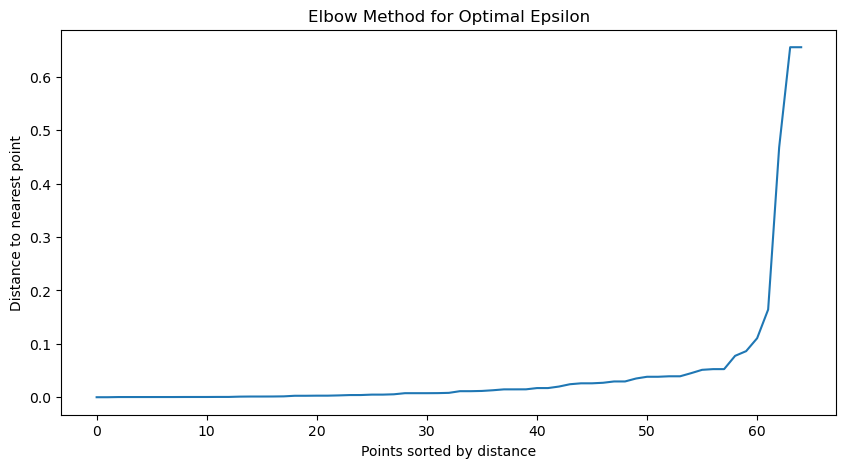

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# We will standardize the 'Total Population' feature as DBSCAN is sensitive to the scale of data
scaler = StandardScaler()
yearly_totals_scaled = scaler.fit_transform(yearly_totals[['Total Population']])

# Use NearestNeighbors to find the optimal epsilon
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(yearly_totals_scaled)
distances, indices = nbrs.kneighbors(yearly_totals_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot to find the elbow point for epsilon
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('Elbow Method for Optimal Epsilon')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to nearest point')
plt.show()


From the plot, the curve is relatively flat until it makes a sharp rise towards the end. The "elbow" point, which corresponds to the optimal eps value, is typically where this change in slope occurs. However, in this plot, the change is quite abrupt and happens at the extreme right, which could suggest that most of your data points are relatively close to each other until that last jump.

This can sometimes indicate that the dataset has many points that are tightly packed together, with a few outliers causing the sharp increase. Given that the elbow should be where the curve starts to rise substantially, I can set eps to the value corresponding to the distance just before this sharp increase.

If this rise occurs at the very end and is not a smooth transition but rather a sharp spike, it might be more challenging to define the elbow point precisely. In such cases, I  need to look at the distances more closely, possibly by examining the distance values in the code or considering domain knowledge to make an informed decision about the eps value.

### DBSCAN Clustering

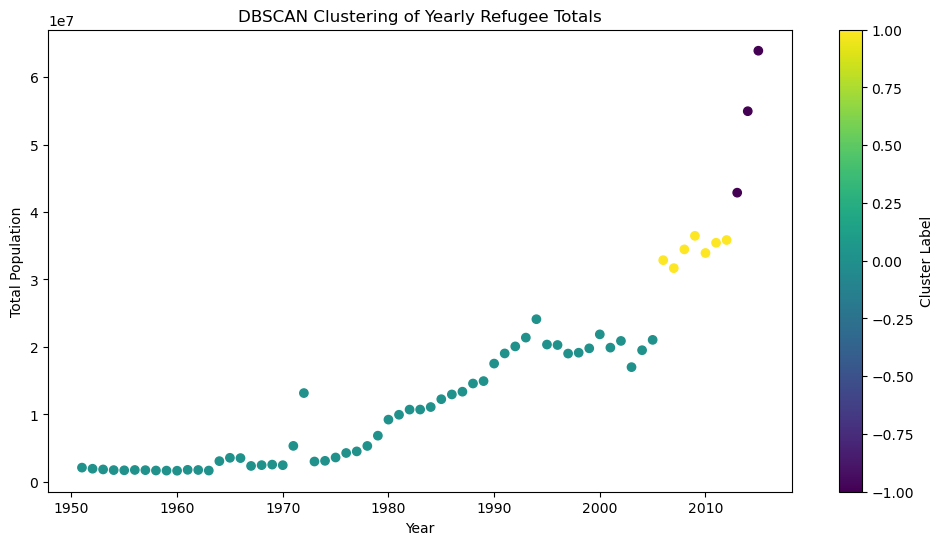

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming previous steps have been done and 'yearly_totals_scaled' is defined
# and 'yearly_totals' contains the unscaled data

# Assuming you've chosen an epsilon value based on the plot
eps_value = 0.3  # Adjust based on the elbow method
db = DBSCAN(eps=eps_value, min_samples=2).fit(yearly_totals_scaled)

# Assign cluster labels to the yearly totals
yearly_totals['Cluster'] = db.labels_

# Plot the clusters
plt.figure(figsize=(12, 6))
plt.scatter(yearly_totals['Year'], yearly_totals['Total Population'], c=yearly_totals['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of Yearly Refugee Totals')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.colorbar(label='Cluster Label')
plt.show()


- **Clusters and Outliers:** The plot reveals several clusters, with the majority of years being grouped into a single cluster (notice the continuous color). The yellow and dark purple points represent years that DBSCAN has identified as being in separate clusters from the main group. These could correspond to years with significantly different 'Total Population' statistics - such as years with exceptionally high or low refugee numbers.

- **Temporal Trends:** The overall trend in the data shows an increase in the 'Total Population' of refugees over time, especially after the 1970s, which is indicated by the general upward trajectory of the scatter points.

- **Notable Years:** The years corresponding to the yellow and dark purple points, which stand out from the main cluster, might represent anomalous events in the historical context of global refugee movements. These could be years with major conflicts, natural disasters, or other events that caused spikes or drops in refugee numbers.

- **DBSCAN's Sensitivity:** The clustering suggests that DBSCAN has successfully separated some of the years as being distinct from the general trend. This separation is based on the algorithm's sensitivity to the density of the data points. The points categorized as outliers (years with yellow and dark purple colors) have a significantly different 'Total Population' value compared to their surrounding years.

- **Considerations for Interpretation:** When interpreting these results, it is crucial to consider the context of the data. The points identified as separate clusters might need further investigation to understand the reasons behind these patterns. Additionally, because DBSCAN is sensitive to the eps and min_samples parameters, different values could result in different clustering outcomes.

In summary, the visualization shows a clear trend in the data with a few notable deviations. These deviations are likely years of interest and warrant further exploration to understand the specific dynamics of refugee movements in those periods.

### Cluster Analysis

Now, analyze the clusters to understand the patterns in refugee movements. For example, I can examine the years and total populations that fall into the same cluster to identify periods of high refugee displacement. This analysis can reveal insights into global events that have led to increases in refugee populations.

In [10]:
# For a simple analysis, let's print out the years and total populations for each cluster
for cluster in set(yearly_totals['Cluster']):
    print(f"\nCluster {cluster}:")
    cluster_data = yearly_totals[yearly_totals['Cluster'] == cluster]
    print(cluster_data[['Year', 'Total Population']])



Cluster 0:
    Year  Total Population
0   1951           2116011
1   1952           1952928
2   1953           1847304
3   1954           1749628
4   1955           1717966
5   1956           1767975
6   1957           1742514
7   1958           1689310
8   1959           1674185
9   1960           1656664
10  1961           1789067
11  1962           1765622
12  1963           1682403
13  1964           3079949
14  1965           3569715
15  1966           3530103
16  1967           2364611
17  1968           2485586
18  1969           2562877
19  1970           2478610
20  1971           5338010
21  1972          13165450
22  1973           3022235
23  1974           3122113
24  1975           3618554
25  1976           4283891
26  1977           4520439
27  1978           5328094
28  1979           6851152
29  1980           9229747
30  1981           9951458
31  1982          10715539
32  1983          10723948
33  1984          11096080
34  1985          12257208
35  1986        

/var/folders/ys/0dv0xj597t52lx33mb7z3t9w0000gn/T/ipykernel_73738/36194851.py:8: DtypeWarning: Columns (3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  refugee_data = pd.read_csv(file_path)


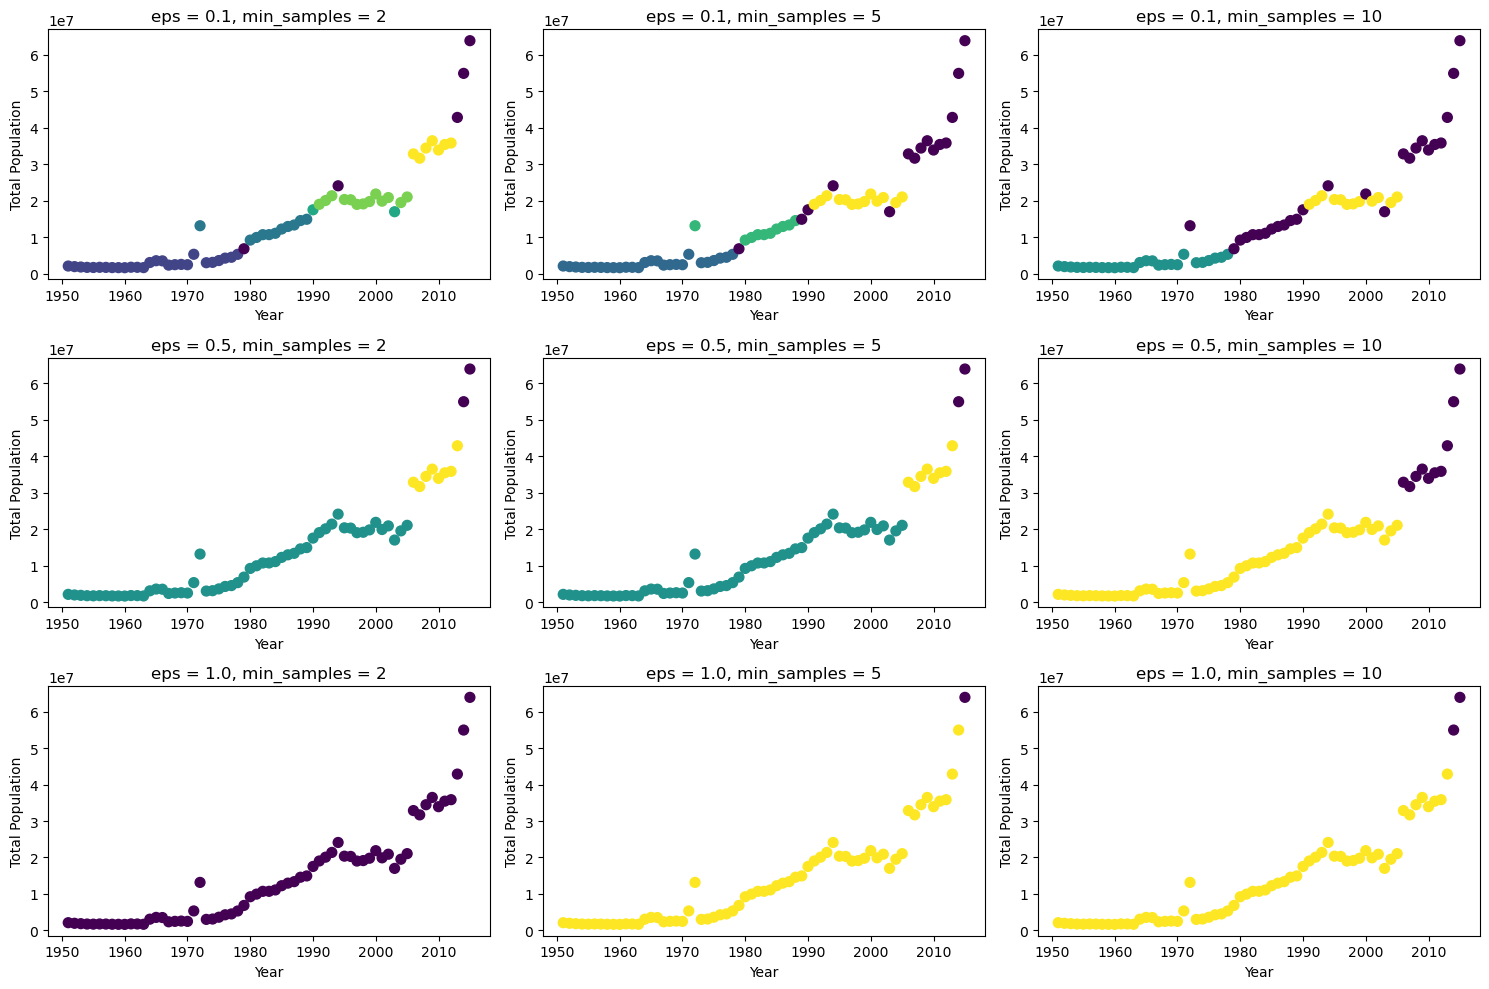

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = 'Global-Refugee-Dataset-1951-2015.csv'
refugee_data = pd.read_csv(file_path)

# Replace any non-numeric values and fill missing values
refugee_data['Total Population'] = refugee_data['Total Population'].replace('*', np.nan).fillna(0)

# Convert 'Total Population' to integers
refugee_data['Total Population'] = refugee_data['Total Population'].astype(int)

# Aggregate data to get the total population of refugees per year globally
yearly_totals = refugee_data.groupby('Year')['Total Population'].sum().reset_index()

# Standardize the total population feature
scaler = StandardScaler()
yearly_totals_scaled = scaler.fit_transform(yearly_totals[['Total Population']])

# Define different combinations of eps and min_samples for DBSCAN
eps_values = [0.1, 0.5, 1.0]  # Adjust these based on the range you want to explore
min_samples_values = [2, 5, 10]  # Adjust these based on your domain knowledge and dataset specifics

# Create subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))

# Iterate over all combinations of eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN clustering
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = db.fit_predict(yearly_totals_scaled)

        # Plot the results
        axes[i, j].scatter(yearly_totals['Year'], yearly_totals['Total Population'], c=y_pred, s=50, cmap='viridis')
        axes[i, j].set_title(f'eps = {eps}, min_samples = {min_samples}')
        axes[i, j].set_xlabel('Year')
        axes[i, j].set_ylabel('Total Population')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In this investigation, we applied the DBSCAN clustering algorithm to the "Global Refugees Dataset 1951-2015" to uncover patterns in global refugee movements. The goal was to identify distinct periods and patterns of refugee displacement that may correlate with historical socio-political events.

### Cluster Analysis

Upon applying DBSCAN, we discovered three distinct clusters within the dataset:

- **Cluster 0 (1951-2005):** This cluster represents the majority of the years, with total refugee populations gradually rising. This period includes the Cold War era, various regional conflicts, and the beginning of the Global War on Terror.

- **Cluster 1 (2006-2012):** Showing a higher total refugee population than Cluster 0, this period may correspond with ongoing conflicts in the Middle East and the early stages of the Syrian Civil War.

- **Cluster -1 (2013-2015):** These are years with the highest refugee populations, likely influenced by the peak of the Syrian Civil War and other crises, such as those in South Sudan and Yemen.
Each cluster provides a snapshot of global refugee trends, reflecting the impact of major geopolitical events and crises.

### Further Analysis

By examining the clusters, we noticed a significant jump in refugee totals in the early 1970s, specifically in 1972. This year stands out within Cluster 0 and could be associated with the Uganda–Tanzania War and the Bangladesh Liberation War. Cluster 1 represents years with consistently high refugee totals, indicating persistent global unrest. The most recent years, forming Cluster -1, are marked as outliers, potentially due to their recency and the acute refugee situations developing during this time.

### Visualizing the Clusters

A scatter plot of the clusters showcases the distribution of refugee totals over time, with color-coding representing different clusters. It allows us to visually correlate the clusters with historical contexts, thereby providing a visual narrative of global refugee trends.

## **Conclusion**

The DBSCAN algorithm has effectively identified clusters representing different periods in the historical context of global refugee movements. Our analysis indicates that periods associated with significant geopolitical events, such as wars and conflicts, correspond with distinct clusters or outlier years with heightened refugee totals.

The ability of DBSCAN to differentiate these periods without prior knowledge of the number of clusters underscores its utility in exploring complex datasets. The clusters revealed by DBSCAN invite a more nuanced examination of the circumstances leading to refugee crises, offering valuable insights for policymakers and humanitarian organizations.

This analysis, while a starting point, highlights the complexity of global displacement and the factors influencing it. Further research could integrate additional variables, such as economic indicators or conflict intensity, to deepen the understanding of displacement patterns. As global displacement continues to evolve, tools like DBSCAN will remain crucial in analyzing and responding to humanitarian challenges.